## **Day 23 of 30 days Data Analysis**

### ***Creating a simple dashboard with matplotlib and seaborn***

### ***1. Load dataset:***

In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\week02_sql\\supermarket_d14.csv")
df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,...,Payment_Credit card,Payment_Ewallet,City_Naypyitaw,City_Yangon,CustomerType_lbl,Year,Month,Day,Weekday,Hour
0,750-67-8428,Alex,0,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,...,False,True,False,True,Member,2019,1,5,Saturday,13
1,226-31-3081,Giza,1,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,...,False,False,True,False,Normal,2019,3,8,Friday,10
2,631-41-3108,Alex,1,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,...,True,False,False,True,Normal,2019,3,3,Sunday,13
3,123-19-1176,Alex,0,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,...,False,True,False,True,Member,2019,1,27,Sunday,20
4,373-73-7910,Alex,0,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,...,False,True,False,True,Member,2019,2,8,Friday,10


### ***2. Sales chart by Branch:***

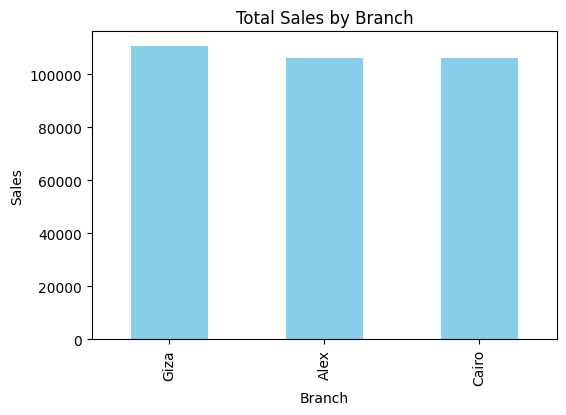

In [19]:
import matplotlib.pyplot as plt

branch_sales = df.groupby("Branch")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
branch_sales.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Branch")
plt.ylabel("Sales")
plt.show()

### ***3. Monthly sales chart:***

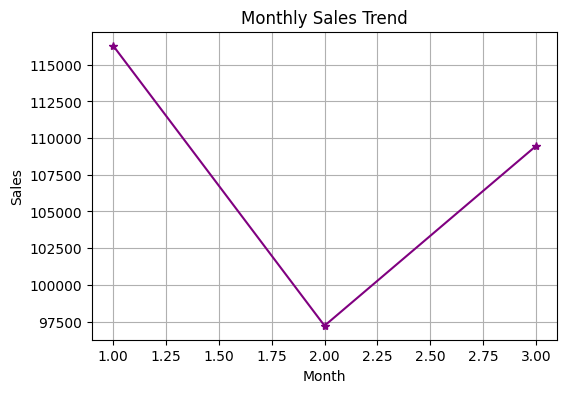

In [8]:
df["Date"] = pd.to_datetime(df["Date"])
monthly_sales = df.groupby(df["Date"].dt.month)["Sales"].sum()

plt.figure(figsize=(6,4))
monthly_sales.plot(kind="line", marker="*", color="purple")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

### ***4. Payment type pie chart:***

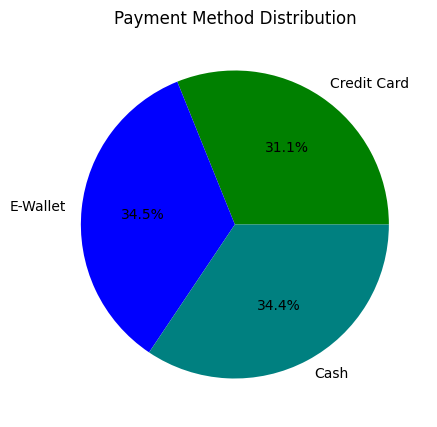

In [18]:
payment_counts = {
    "Credit Card": df["Payment_Credit card"].sum(),
    "E-Wallet": df["Payment_Ewallet"].sum(),
    "Cash": len(df) - df["Payment_Credit card"].sum() - df["Payment_Ewallet"].sum()
}

plt.figure(figsize=(5,5))
plt.pie(payment_counts.values(), labels=payment_counts.keys(), autopct="%1.1f%%", colors=["green", "blue", "teal"])
plt.title("Payment Method Distribution")
plt.show()

### ***5. Final dashboard:***

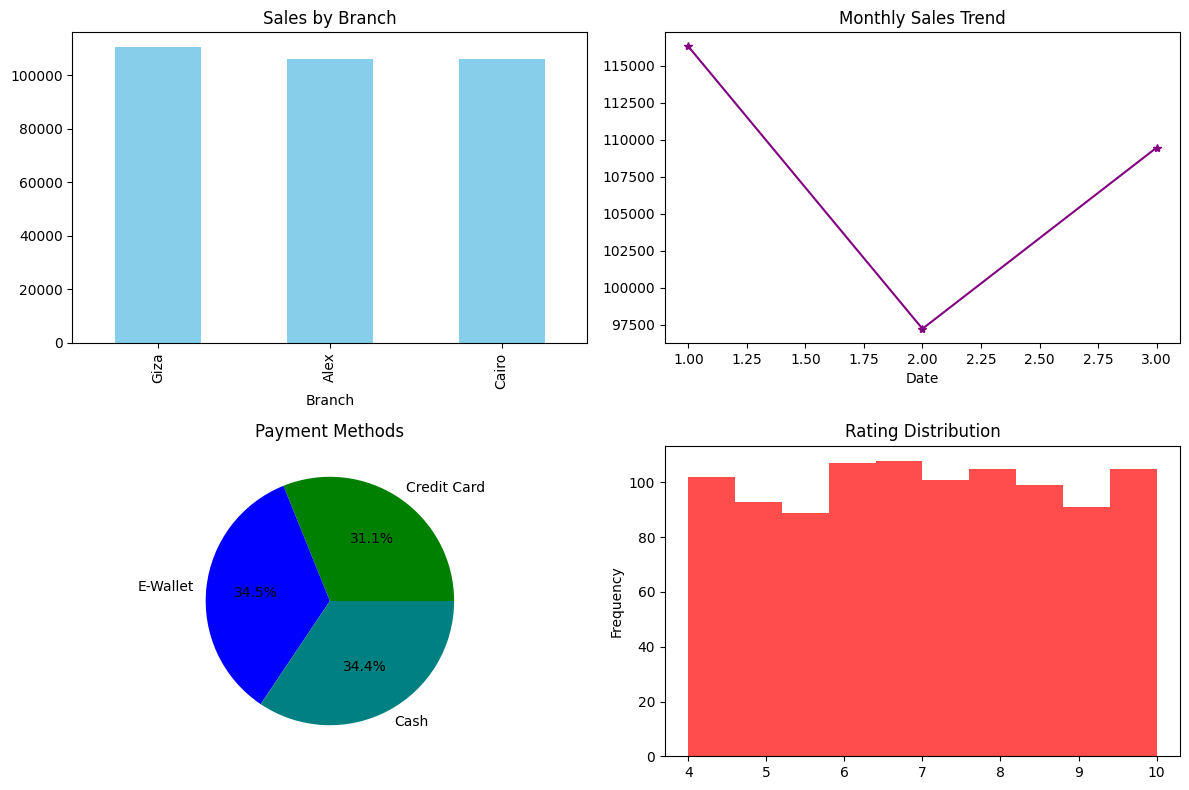

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# Sales by Branch
branch_sales.plot(kind="bar", ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Sales by Branch")

# Monthly Sales
monthly_sales.plot(kind="line", marker="*", ax=axes[0,1], color="purple")
axes[0,1].set_title("Monthly Sales Trend")

# Payment Distribution (Pie Chart)
axes[1,0].pie(payment_counts.values(), labels=payment_counts.keys(), autopct="%1.1f%%", colors=["green", "blue", "teal"])
axes[1,0].set_title("Payment Methods")

# Rating Distribution
df["Rating"].plot(kind="hist", bins=10, ax=axes[1,1], color="red", alpha=0.7)
axes[1,1].set_title("Rating Distribution")

plt.tight_layout()
plt.show()


### ***Dashboard - Day 23***

*- Combined multiple visualizations into a single dashboard.*

*- Showed sales by branch, monthly sales trends, payment method distribution, and customer rating distribution.*

*- Practiced subplot layouts for clear presentation.*